In [93]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [94]:
#скачали dataset 
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [95]:
# 60000 изображений размером 28x28
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [96]:
class_names = [
    'zero',    
    'one',        
    'two',       
    'three',          
    'four',           
    'five',         
    'six',         
    'seven',        
    'eight',           
    'nine'      
]

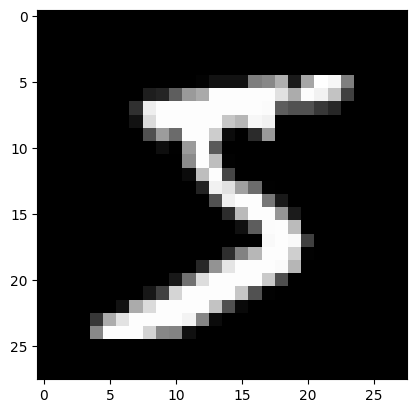

In [97]:
plt.imshow(train_x[0], cmap='grey')

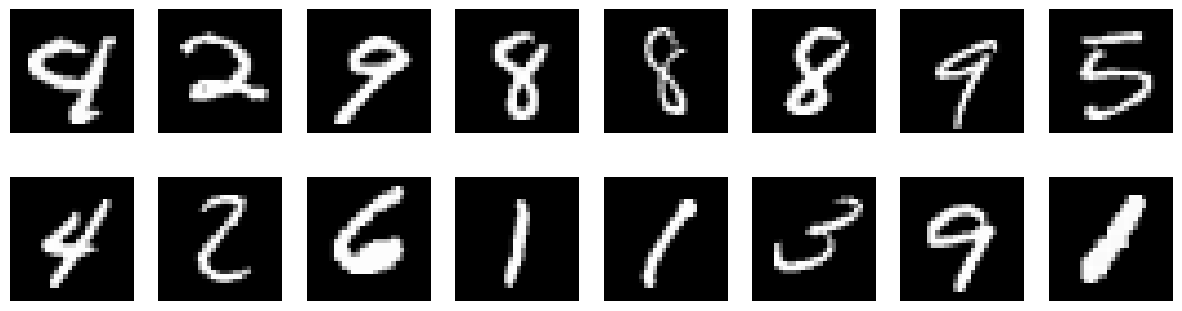

In [98]:
# посмотрим на примеры картинок
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(train_y))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(train_x[random_index, :], cmap = 'grey')

plt.show()

In [99]:
#преобразуем целочисленные значения пикселей в диапазон [0, 1] и сдвигает диапазон к [-0.5, 0.5]
train_x_2 = train_x.astype('float32') / 255 - 0.5
test_x_2 = test_x.astype('float32') / 255 - 0.5

#преобразуем значения в вид one_hot 
# 3 = [0,0,1,0,0,0,0,0,0,0]
train_y_onehot = keras.utils.to_categorical(train_y, 10)
test_y_onehot = keras.utils.to_categorical(test_y, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Conv2D (Сверточный слой)
# MaxPooling2D (Уменьшение размерность)
# Flatten (Преобразует 2D/3D данные в 1D вектор)
# Dense (Полносвязный слой)
# Dropout ( Случайно отключает нейроны во время обучения)


In [ ]:
model = Sequential()
#filters=16 (16 фильтров), kernel_size=3 (ядро 3х3), padding='same' (0 вокруг изображения), input_shape=(32,32,3) (входное изображение)
model.add(L.Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
model.add(L.Conv2D(filters=32, kernel_size=3, padding='same',activation='relu'))
model.add(L.MaxPool2D())
model.add(L.Dropout(0.25))

model.add(L.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(L.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(L.MaxPool2D())
model.add(L.Dropout(0.25)) 

model.add(L.Flatten())
model.add(L.Dense(128, activation='relu'))
model.add(L.Dropout(0.25))
model.add(L.Dense(10, activation='softmax'))

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Освобождение памяти от предыдущих архитектур нейросетей.
K.clear_session()
# вывод архитектуры модели
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,370 (1.66 MB)

 Trainable params: 435,370 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    # Функция потерь - измеряет, насколько предсказания модели отличаются от реальных значений
    loss = 'categorical_crossentropy',
    # Алгоритм оптимизации - определяет, как обновлять веса модели во время обучения
    optimizer='adam',
    # Метрики качества - показывают, насколько хорошо модель работает
    metrics=['accuracy']
)

# Для целых чисел (не one-hot): loss='sparse_categorical_crossentropy'
# Для бинарной классификации: loss='binary_crossentropy'
# Для регрессии: loss='mse'  

# optimizer='sgd'      # Статистический градиентный спуск
# optimizer='rmsprop'  # Для RNN
# optimizer='adagrad'  # Адаптивный

# Для классификации:
# metrics=['accuracy', 'precision', 'recall', 'f1_score']

# Для регрессии:  
# metrics=['mae', 'mse']  # Средняя абсолютная ошибка, Среднеквадратическая ошибка

In [104]:
history = model.fit(
                    train_x_2, 
                    train_y_onehot,
                    batch_size=64,  # 64 объекта для подсчета градиента на каждом шаге
                    epochs=10,  # 10 проходов по датасету
                    validation_data=(test_x_2, test_y_onehot)
                    )

Epoch 1/10


938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9310 - loss: 0.2186 - val_accuracy: 0.9886 - val_loss: 0.0371
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9796 - loss: 0.0674 - val_accuracy: 0.9906 - val_loss: 0.0311
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9847 - loss: 0.0496 - val_accuracy: 0.9928 - val_loss: 0.0236
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9883 - loss: 0.0380 - val_accuracy: 0.9932 - val_loss: 0.0204
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9897 - loss: 0.0340 - val_accuracy: 0.9947 - val_loss: 0.0189
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9905 - loss: 0.0289 - val_accuracy: 0.9927 - val_loss: 0.0225
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9914 - loss: 0.0273 - val_accuracy: 0.9935 - val_loss: 0.0196
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9929 - loss: 0.0233 - val_accurac

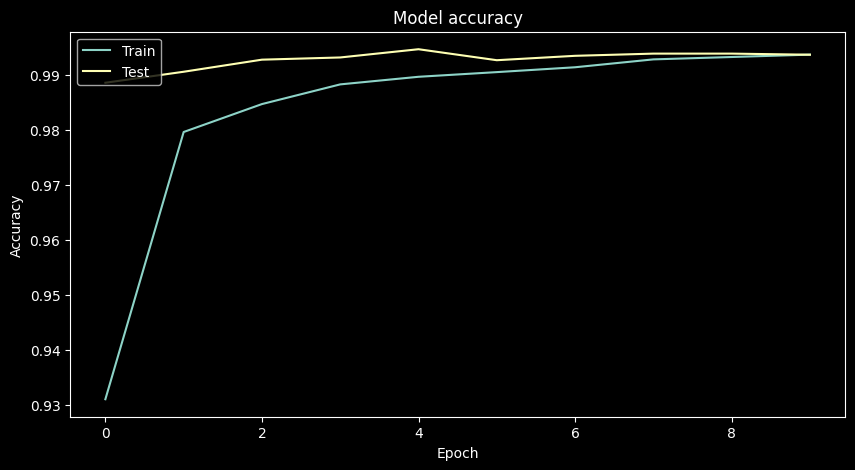

In [105]:
# визуализации обучения  модели во время обучения
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

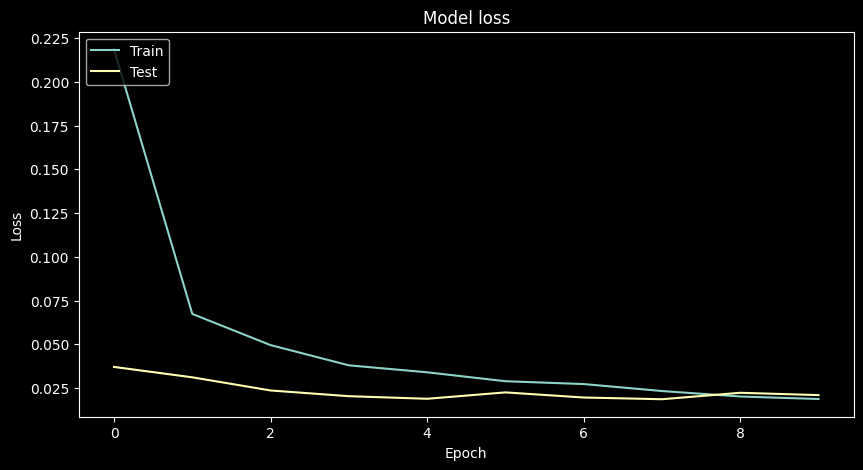

In [106]:
# визуализации потерь (loss) модели во время обучения
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()